In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pm25 = np.array([0.0, 12.0, 35.4, 55.4, 150.4, 250.4,])
o3 = np.array([0, 54, 70, 85, 105, 200,])
aqi = np.array([0, 50, 100, 150, 200, 300,])

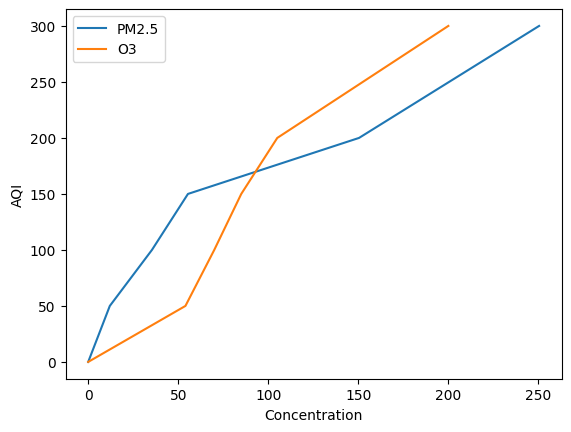

In [3]:
plt.plot(pm25, aqi, label='PM2.5')
plt.plot(o3, aqi, label='O3')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

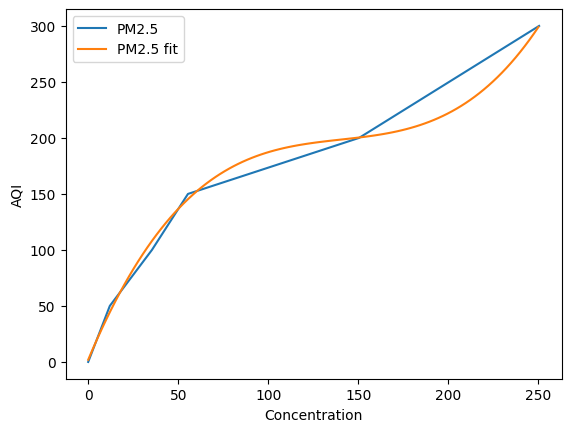

In [12]:
coeff = np.polyfit(pm25, aqi, 3)

aqi_pm25 = np.poly1d(coeff)
line = np.linspace(0, 250, 100)

plt.plot(pm25, aqi, label='PM2.5')
plt.plot(line, aqi_pm25(line), label='PM2.5 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

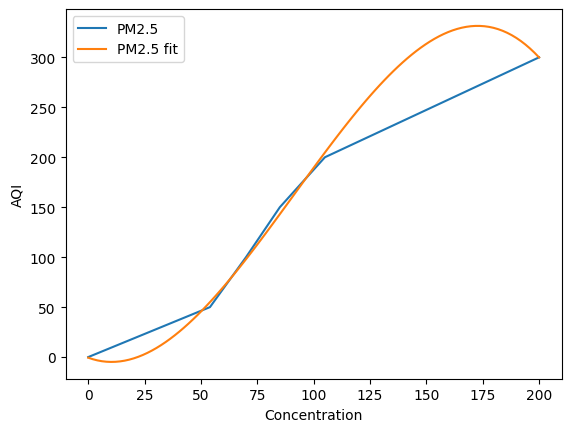

In [16]:
coeff = np.polyfit(o3, aqi, 3)

aqi_o3 = np.poly1d(coeff)
line = np.linspace(0, 200, 100)

plt.plot(o3, aqi, label='PM2.5')
plt.plot(line, aqi_o3(line), label='PM2.5 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('../datasets/aqi/aqi_breakpoints.csv')

In [18]:
df.head()

,Parameter,Parameter Code,Duration Code,Duration Description,AQI Category,Low AQI,High AQI,Low Breakpoint,High Breakpoint
0,Acceptable PM2.5 AQI & Speciation Mass,88502,7,24 HOUR,GOOD,0,50,0.0,9.0
1,Acceptable PM2.5 AQI & Speciation Mass,88502,7,24 HOUR,MODERATE,51,100,9.1,35.4
2,Acceptable PM2.5 AQI & Speciation Mass,88502,7,24 HOUR,UNHEALTHY FOR SENSITIVE,101,150,35.5,55.4
3,Acceptable PM2.5 AQI & Speciation Mass,88502,7,24 HOUR,UNHEALTHY,151,200,55.5,125.4
4,Acceptable PM2.5 AQI & Speciation Mass,88502,7,24 HOUR,VERY UNHEALTHY,201,300,125.5,225.4


In [34]:
aqi_df = df.loc[df['Parameter Code'] == 88502].loc[df['Duration Code'] == 'X']
# df['Parameter Code'] == '88502' and df['Duration Code'] == 'X'

In [43]:
aqi_df.head(10)

,Parameter,Parameter Code,Duration Code,Duration Description,AQI Category,Low AQI,High AQI,Low Breakpoint,High Breakpoint
7,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,GOOD,0,50,0.0,9.0
8,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,MODERATE,51,100,9.1,35.4
9,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,UNHEALTHY FOR SENSITIVE,101,150,35.5,55.4
10,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,UNHEALTHY,151,200,55.5,125.4
11,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,VERY UNHEALTHY,201,300,125.5,225.4
12,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,HAZARDOUS,301,500,225.5,325.4
13,Acceptable PM2.5 AQI & Speciation Mass,88502,X,24-HR BLK AVG,HAZARDOUS,501,999,325.5,99999.9


In [46]:
aqi_raw = aqi_df['High AQI'].values
pm25_raw = aqi_df['High Breakpoint'].values

aqi_raw, pm25_raw = aqi_raw.astype(np.float32), pm25_raw.astype(np.float32)
aqi_raw, pm25_raw = np.delete(aqi_raw, -1), np.delete(pm25_raw, -1)
aqi_raw, pm25_raw = np.insert(aqi_raw, 0, 0), np.insert(pm25_raw, 0, 0)
aqi_raw, pm25_raw

(array([  0.,  50., 100., 150., 200., 300., 500.], dtype=float32),
 array([  0. ,   9. ,  35.4,  55.4, 125.4, 225.4, 325.4], dtype=float32))

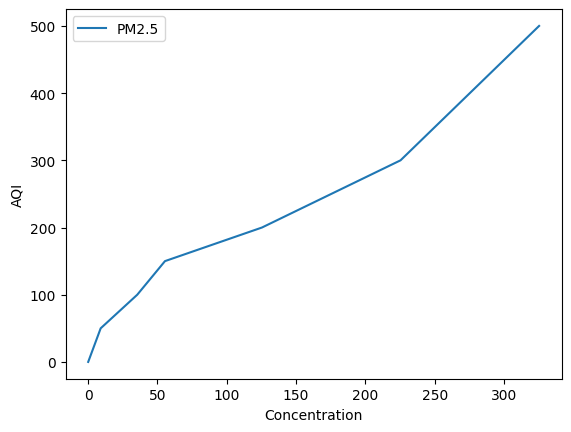

In [47]:
plt.plot(pm25_raw, aqi_raw, label='PM2.5')
# plt.plot(line, aqi_pm25(line), label='PM2.5 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

[ 3.13272740e-05 -1.46498622e-02  2.94985043e+00  1.35209508e+01]


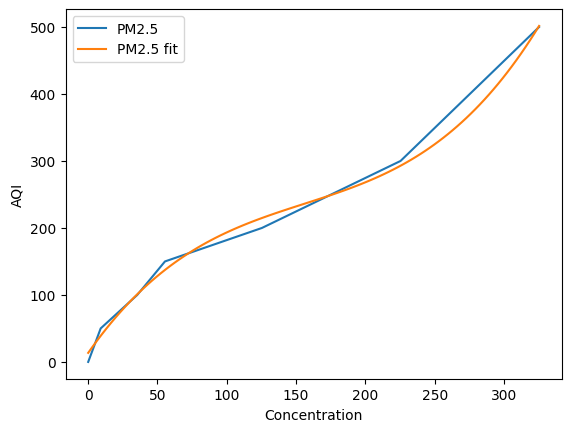

In [83]:
coeff = np.polyfit(pm25_raw, aqi_raw, 3)
print(coeff)
aqi_pm25 = np.poly1d(coeff)
line = np.linspace(0, pm25_raw.max(), 100)

plt.plot(pm25_raw, aqi_raw, label='PM2.5')
plt.plot(line, aqi_pm25(line), label='PM2.5 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [50]:
o3_df = df.loc[df['Parameter Code'] == 44201].loc[df['Duration Code'] == 'W']
# df['Parameter Code'] == '88502' and df['Duration Code'] == 'X'
o3_df.head(10)

,Parameter,Parameter Code,Duration Code,Duration Description,AQI Category,Low AQI,High AQI,Low Breakpoint,High Breakpoint
34,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,NONE,-1,-1,0.505,99999.000
35,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,GOOD,0,50,0.000,0.054
36,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,MODERATE,51,100,0.055,0.070
37,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,UNHEALTHY FOR SENSITIVE,101,150,0.071,0.085
38,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,UNHEALTHY,151,200,0.086,0.105
39,Ozone,44201,W,8-HR RUN AVG BEGIN HOUR,VERY UNHEALTHY,201,300,0.106,0.200


In [53]:
aqio3_raw = o3_df['High AQI'].values
o3_raw = o3_df['High Breakpoint'].values

aqio3_raw, o3_raw = aqio3_raw.astype(np.float32), o3_raw.astype(np.float32)
aqio3_raw, o3_raw = np.delete(aqio3_raw, 0), np.delete(o3_raw, 0)
aqio3_raw, o3_raw = np.insert(aqio3_raw, 0, 0), np.insert(o3_raw, 0, 0)
aqio3_raw, o3_raw

(array([  0.,  50., 100., 150., 200., 300.], dtype=float32),
 array([0.   , 0.054, 0.07 , 0.085, 0.105, 0.2  ], dtype=float32))

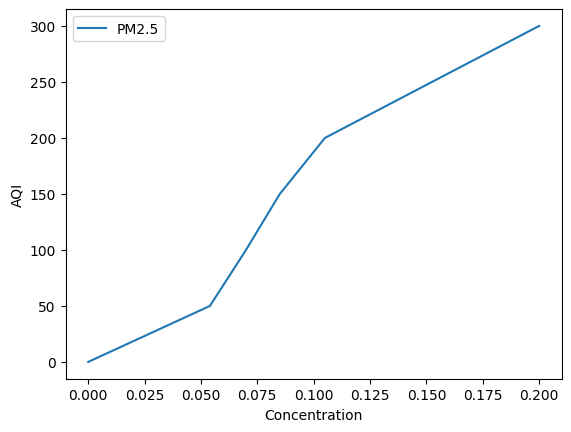

In [54]:
plt.plot(o3_raw, aqio3_raw, label='PM2.5')
# plt.plot(line, aqi_pm25(line), label='PM2.5 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

[-1.57062739e+05  4.31334063e+04 -8.42133187e+02 -5.68847674e-01]


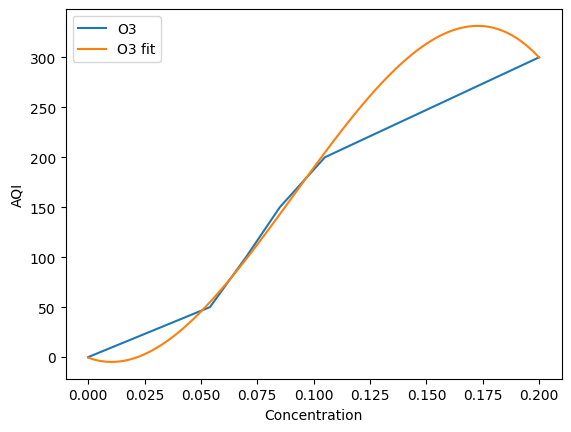

In [63]:
coeff = np.polyfit(o3_raw, aqio3_raw, 3)
print(coeff)
aqi_o3 = np.poly1d(coeff)
line = np.linspace(0, o3_raw.max(), 100)

plt.plot(o3_raw, aqio3_raw, label='O3')
plt.plot(line, aqi_o3(line), label='O3 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

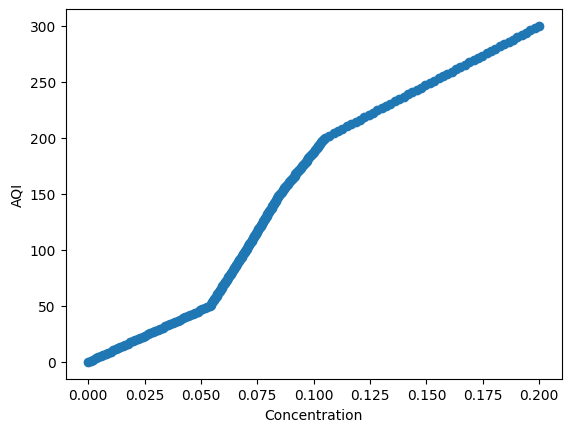

In [70]:
# Define the arrays
y = aqio3_raw
x = o3_raw

# Initialize lists to store interpolated points
x_interp = []
y_interp = []

# Generate interpolated points between each pair of consecutive points
for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 50)[1:-1]  # 10 points excluding boundaries
    y_new = np.linspace(y[i], y[i + 1], 50)[1:-1]
    x_interp.extend(x_new)
    y_interp.extend(y_new)

# Combine original and interpolated points
x_combined = np.sort(np.concatenate((x, x_interp)))
y_combined = np.sort(np.concatenate((y, y_interp)))

plt.plot(x_combined, y_combined, 'o')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.show()

[-9.56124554e+04  2.45108993e+04  2.75505106e+02 -2.74034737e+00]


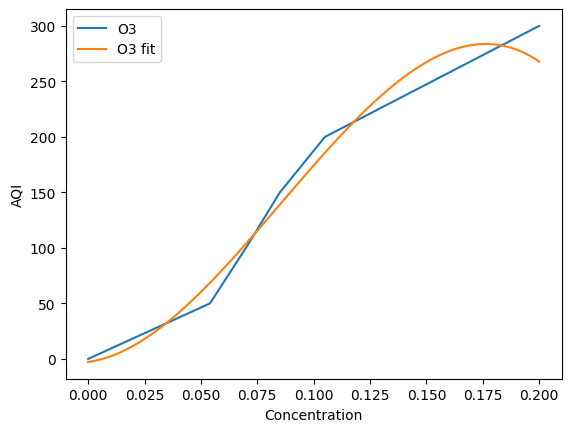

In [71]:
coeff = np.polyfit(x_combined, y_combined, 3)
print(coeff)
aqi_o3 = np.poly1d(coeff)
line = np.linspace(0, x_combined.max(), 100)

plt.plot(x_combined, y_combined, label='O3')
plt.plot(line, aqi_o3(line), label='O3 fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()

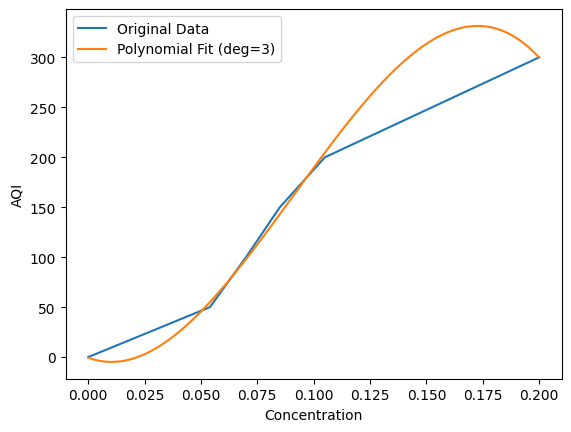

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x = np.array([0.0, 0.054, 0.07, 0.085, 0.105, 0.2])
y = np.array([0., 50., 100., 150., 200., 300.])

# Fit a polynomial
degree = 3  # Adjust degree as needed
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Generate smoother points
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = polynomial(x_smooth)

# Plot
plt.plot(x, y, label='Original Data')  # Original points
plt.plot(x_smooth, y_smooth, '-', label=f'Polynomial Fit (deg={degree})')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()


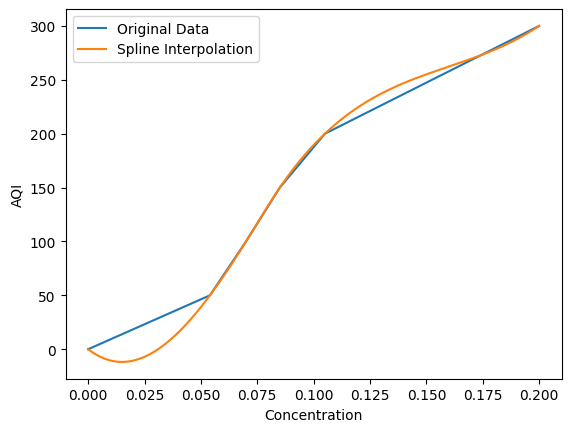

In [74]:
from scipy.interpolate import make_interp_spline

# Generate smoother spline curve
spline = make_interp_spline(x, y)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x_smooth)

# Plot
plt.plot(x, y, label='Original Data')  # Original points
plt.plot(x_smooth, y_smooth, '-', label='Spline Interpolation')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()


/media/rayat69/Essentials/Programming/python/dl-1/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


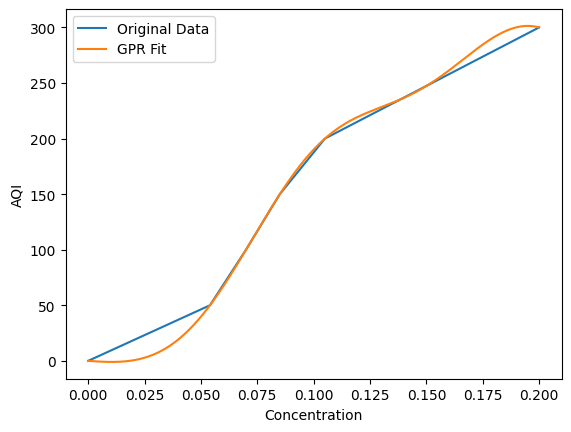

In [78]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Reshape data for GPR
x = x.reshape(-1, 1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit GPR
gpr.fit(x, y)
x_smooth = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_smooth, _ = gpr.predict(x_smooth, return_std=True)
# Plot
plt.plot(x, y, label='Original Data')  # Original points
plt.plot(x_smooth, y_smooth, '-', label='GPR Fit')
plt.xlabel('Concentration')
plt.ylabel('AQI')
plt.legend()
plt.show()